## Initial imports

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})




import os 
path_to_class_sz = os.environ['PATH_TO_CLASS_SZ_DATA']+'/class_sz/class-sz/'

## Settings for the calculations

In [2]:

common_settings = {

                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   'cosmo_model': 0, # This parameter is important if you want to compute with emulators. Set to 0 for lcdm with \Sigma mnu=0.06 eV.

}

# best-fit from Kusiak et al. https://arxiv.org/pdf/2203.12583.pdf

HOD_blue = {
'sigma_log10M_HOD': 0.68660116,
'alpha_s_HOD':    1.3039425,
'M1_prime_HOD': 10**12.701308, # Msun/h
'M_min_HOD': 10**11.795964, # Msun/h
'M0_HOD' :0,
'x_out_truncated_nfw_profile_satellite_galaxies':  1.0868995,
'f_cen_HOD' : 1., 
'full_path_to_dndz_gal': path_to_class_sz + 'class_sz_auxiliary_files/includes/normalised_dndz_cosmos_0.txt',
}


unWISE_common = {
'galaxy_sample': 'custom',
'M0_equal_M_min_HOD':'no',
'x_out_truncated_nfw_profile': 1.0,
    
    
'z_min': 0.005,
'z_max': 3.,
'M_min': 1e10,
'M_max': 3.5e15,

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
    
    
'x_min_gas_density_fftw' : 1e-5,
'x_max_gas_density_fftw' : 1e4,
    
    
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.001,



'hm_consistency': 1,


'delta_for_galaxies': "200c",
'delta_for_matter_density': "200c",
'mass_function': 'T08M200c',
'concentration parameter': 'B13' ,
    

}


In [3]:
# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 50.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 50.0,

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,


'ndim_masses' : 80,
'ndim_redshifts' : 30,




'n_k_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,

# 'n_k_density_profile' : 200, # default 80
# 'n_m_density_profile' : 150, # default= 100 decrease for faster
# 'n_z_density_profile' : 150, # default= 100 decrease for faster

'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
## some settings to try more points to avoid numerical noise in some cases:
## for example
# 'ndim_masses' : 100,
# 'ndim_redshifts' : 100,
# 'n_ell_density_profile' : 100,
# 'n_m_density_profile' : 100,
# 'n_z_density_profile' : 100,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 1024, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
}

## Halo model and effective approach

### Calculate

In [4]:
%%time
M = Class()
M.set(common_settings)
M.set(HOD_blue)
M.set(unWISE_common)
M.set(ksz_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_hf',    

    
'projected_field_filter_file' : path_to_class_sz + 'class_sz_auxiliary_files/includes/s4_fl_A_170422.txt',           

'dlogell' : 0.1,
'ell_max' : 10000.0,
'ell_min' : 10.0,

'gas_profile' : 'B16', # set Battaglia 2016 density profile
'gas_profile_mode' : 'agn',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,

    
## with current settings, the calculation seems more stable without use_fft_for_profiles_transform
## i.e., 'use_fft_for_profiles_transform' : 0
'use_fft_for_profiles_transform' : 0,    

# 'use_bg_at_z_in_ksz2g_eff' : 1,
'non_linear' : 'halofit',


'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,


      })

# M.compute_class_szfast()
M.compute() ## we do both effective approach (fast not available as of now) and hm, so chose compute()

CPU times: user 17min 26s, sys: 5.37 s, total: 17min 31s
Wall time: 2min 7s


In [5]:
cl_kSZ_kSZ_X = M.cl_kSZ_kSZ_kcmb()

In [6]:
cl_kSZ_kSZ_X.keys()

dict_keys(['ell', '1h', '2h', '3h', 'hf', 'covmat', 'lensing term'])

### Plot results

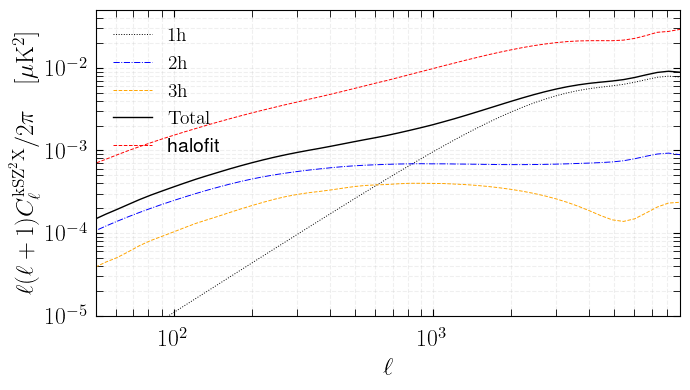

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-5,5e-2)
ax.set_xlim(50,9000)

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_X['ell'])*(np.asarray(cl_kSZ_kSZ_X['ell'])+1.)/2./np.pi

ax.plot(cl_kSZ_kSZ_X['ell'],fac*np.asarray(cl_kSZ_kSZ_X['1h']),label = r'$1\mathrm{h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_X['ell'],fac*np.asarray(cl_kSZ_kSZ_X['2h']),label = r'$2\mathrm{h}$',c='b',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_X['ell'],fac*np.asarray(cl_kSZ_kSZ_X['3h']),label = r'$3\mathrm{h}$',c='orange',ls='--',lw=0.7)
ax.plot(cl_kSZ_kSZ_X['ell'],fac*(np.asarray(cl_kSZ_kSZ_X['1h'])+np.asarray(cl_kSZ_kSZ_X['2h'])+np.asarray(cl_kSZ_kSZ_X['3h'])),
        label = r'$\mathrm{Total}$',c='k',ls='-',lw=1.)
ax.plot(cl_kSZ_kSZ_X['ell'],fac*np.asarray(cl_kSZ_kSZ_X['hf']),label = r'halofit',c='red',ls='--',lw=0.7)
ax.legend(loc=2,ncol = 1,frameon=False,fontsize=14)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^{\mathrm{kSZ^2X}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
fig.tight_layout()
